In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter

In [3]:
analysis_path = Path('../data/analysis/')

### Analysis

In [4]:
combined_df = pd.read_json(analysis_path/"combined_annotations.jsonl", lines=True)

In [5]:
len(combined_df)

228788

In [11]:
combined_df['text-generic-frame'] = combined_df[' text-generic-frame']
combined_df.drop(columns=[' text-generic-frame'], inplace=True)

In [14]:
frame_short_dict = {'economic': 'economic',
 'capacity and resources': 'cap&res',
 'morality': 'morality',
 'fairness and equality': 'fairness',
 'legality, constitutionality and jurisprudence': 'legality',
 'policy prescription and evaluation': 'policy',
 'crime and punishment': 'crime',
 'security and defense': 'security',
 'health and safety': 'health',
 'quality of life': 'quality_life',
 'cultural identity': 'culture',
 'public opinion': 'public_op',
 'political': 'political',
 'external regulation and reputation': 'regulation'
 }

In [15]:
valid_frames = frame_short_dict.values()

### Co-occurence

In [60]:
# Get co-occurrence matrix for frames
cooc_matrix = pd.DataFrame(0.0, index=valid_frames, columns=valid_frames)
for i, (txt_frm_list, img_frm_list) in combined_df[['text-generic-frame', 'img-generic-frame']].iterrows():
    for txt_frm in txt_frm_list:
        for img_frm in img_frm_list:
            if txt_frm in valid_frames and img_frm in valid_frames:
                cooc_matrix.loc[txt_frm, img_frm] += 1/(len(txt_frm_list)+len(img_frm_list))
cooc_matrix

,economic,cap&res,morality,fairness,legality,policy,crime,security,health,quality_life,culture,public_op,political,regulation
economic,1631.121429,2242.005159,176.091270,662.584127,729.790476,1967.767063,521.225000,1060.389286,1338.574603,2860.571032,1996.277381,1456.644048,921.311905,39.052381
cap&res,563.814286,925.944444,30.571429,124.565476,125.427381,632.284921,123.742063,332.428175,349.440079,594.333333,230.413095,267.592063,84.227381,8.564286
morality,9.011905,65.043254,306.135714,299.619048,343.557143,238.434524,282.696429,146.413492,107.551587,195.007540,412.154762,433.328571,251.794048,3.957143
fairness,212.922619,436.781349,295.768651,998.134127,1342.043651,1387.297619,651.458730,503.987302,530.961508,869.701190,888.330159,1546.578968,1462.576190,19.498810
legality,415.439286,784.630556,363.738492,730.200397,3487.765873,2146.787698,2031.461508,1616.565079,873.677778,669.643254,869.600397,1783.588889,2989.862302,61.603571
policy,1026.941667,1730.465873,281.447222,858.125794,1437.903968,2280.373413,1103.382143,1928.540079,1820.091667,1609.955556,1357.725000,1613.720238,1472.436111,70.658333
crime,167.995238,733.002778,391.052778,570.614683,3026.999603,1103.887698,7158.367063,2283.353968,1018.882143,760.335714,855.017857,1512.660317,1849.493254,27.203571
security,181.886905,1415.998413,254.375397,284.089683,860.178968,720.379365,5464.230952,4009.485317,1271.215079,597.315873,409.364683,920.865079,744.576587,63.522619
health,98.419048,2192.413492,241.180952,385.026190,545.433333,429.422619,3058.122619,2316.584921,3997.250397,2172.571825,1101.275000,792.076190,188.241667,10.938095
quality_life,719.370238,2824.882143,500.224206,924.609921,821.398016,1355.950397,1951.588095,1649.469444,2692.633333,5434.852778,4573.745238,2212.089683,559.095635,13.447619


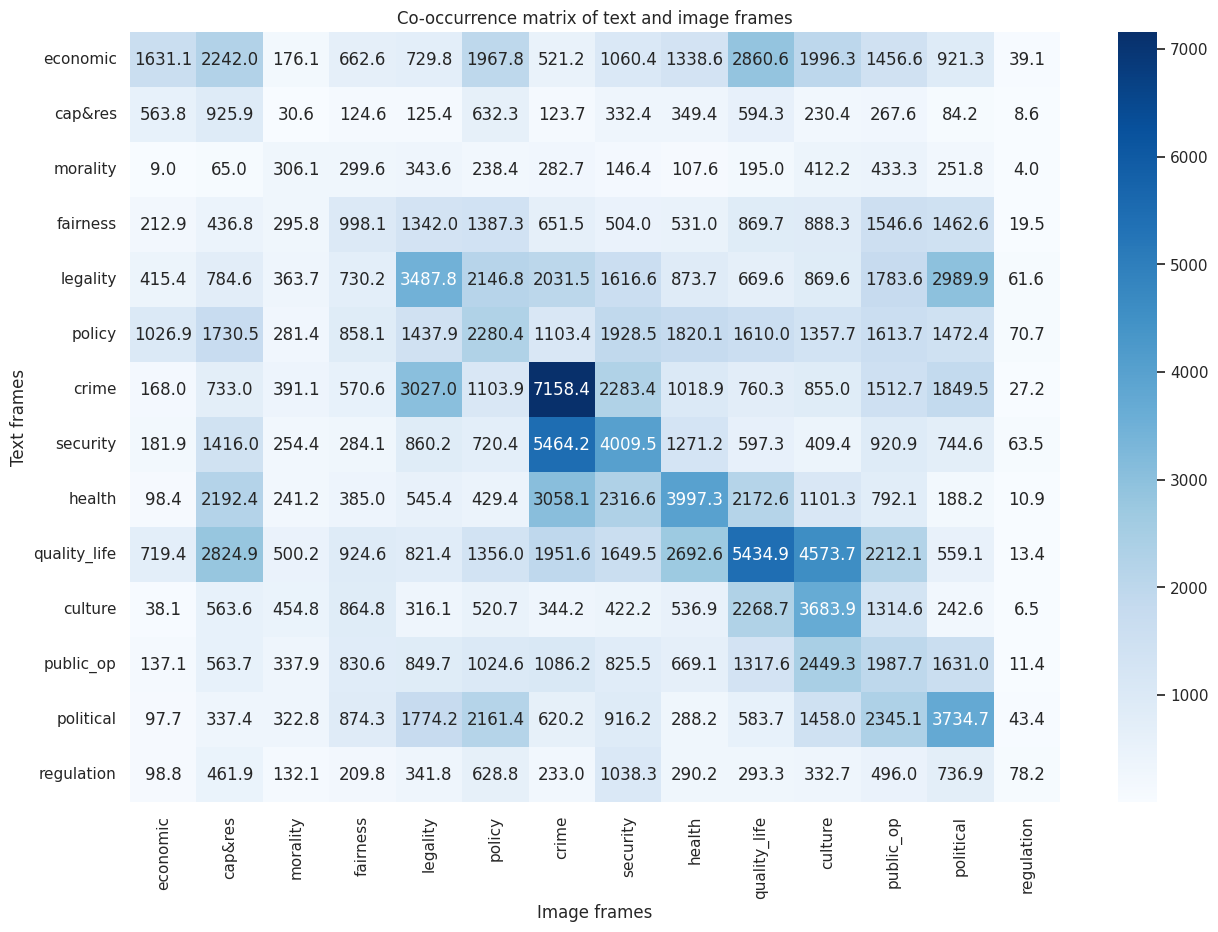

In [66]:
plt.figure(figsize=(15, 10))
sns.heatmap(cooc_matrix, annot=True, fmt='.1f', cmap='Blues')
plt.title('Co-occurrence matrix of text and image frames')
plt.xlabel('Image frames')
plt.ylabel('Text frames')
plt.show()

### Per topic

In [26]:
combined_topic_df = combined_df[combined_df['gpt-topic']!='no_topic']

In [27]:
len(combined_topic_df)

225249

In [29]:
combined_topic_df['text-generic-frame-len'].mean(), combined_topic_df['img-generic-frame-len'].mean()

(3.2094304525214317, 1.3158060635119357)

In [32]:
top_topic_list = list(combined_topic_df['gpt-topic'].value_counts()[:20].keys())
top_topic_df = combined_topic_df[combined_topic_df['gpt-topic'].isin(top_topic_list)]

In [33]:
sns.set(style="whitegrid")
sns.set_color_codes("dark")

### Co-occurence per topic

In [51]:
sel_topic_list = ['Environment', 'Immigration', 'Politics', 'War', 'Education']
# selected_topic_df = combined_topic_df[combined_topic_df['gpt_topic'].isin(sel_topic_list)]

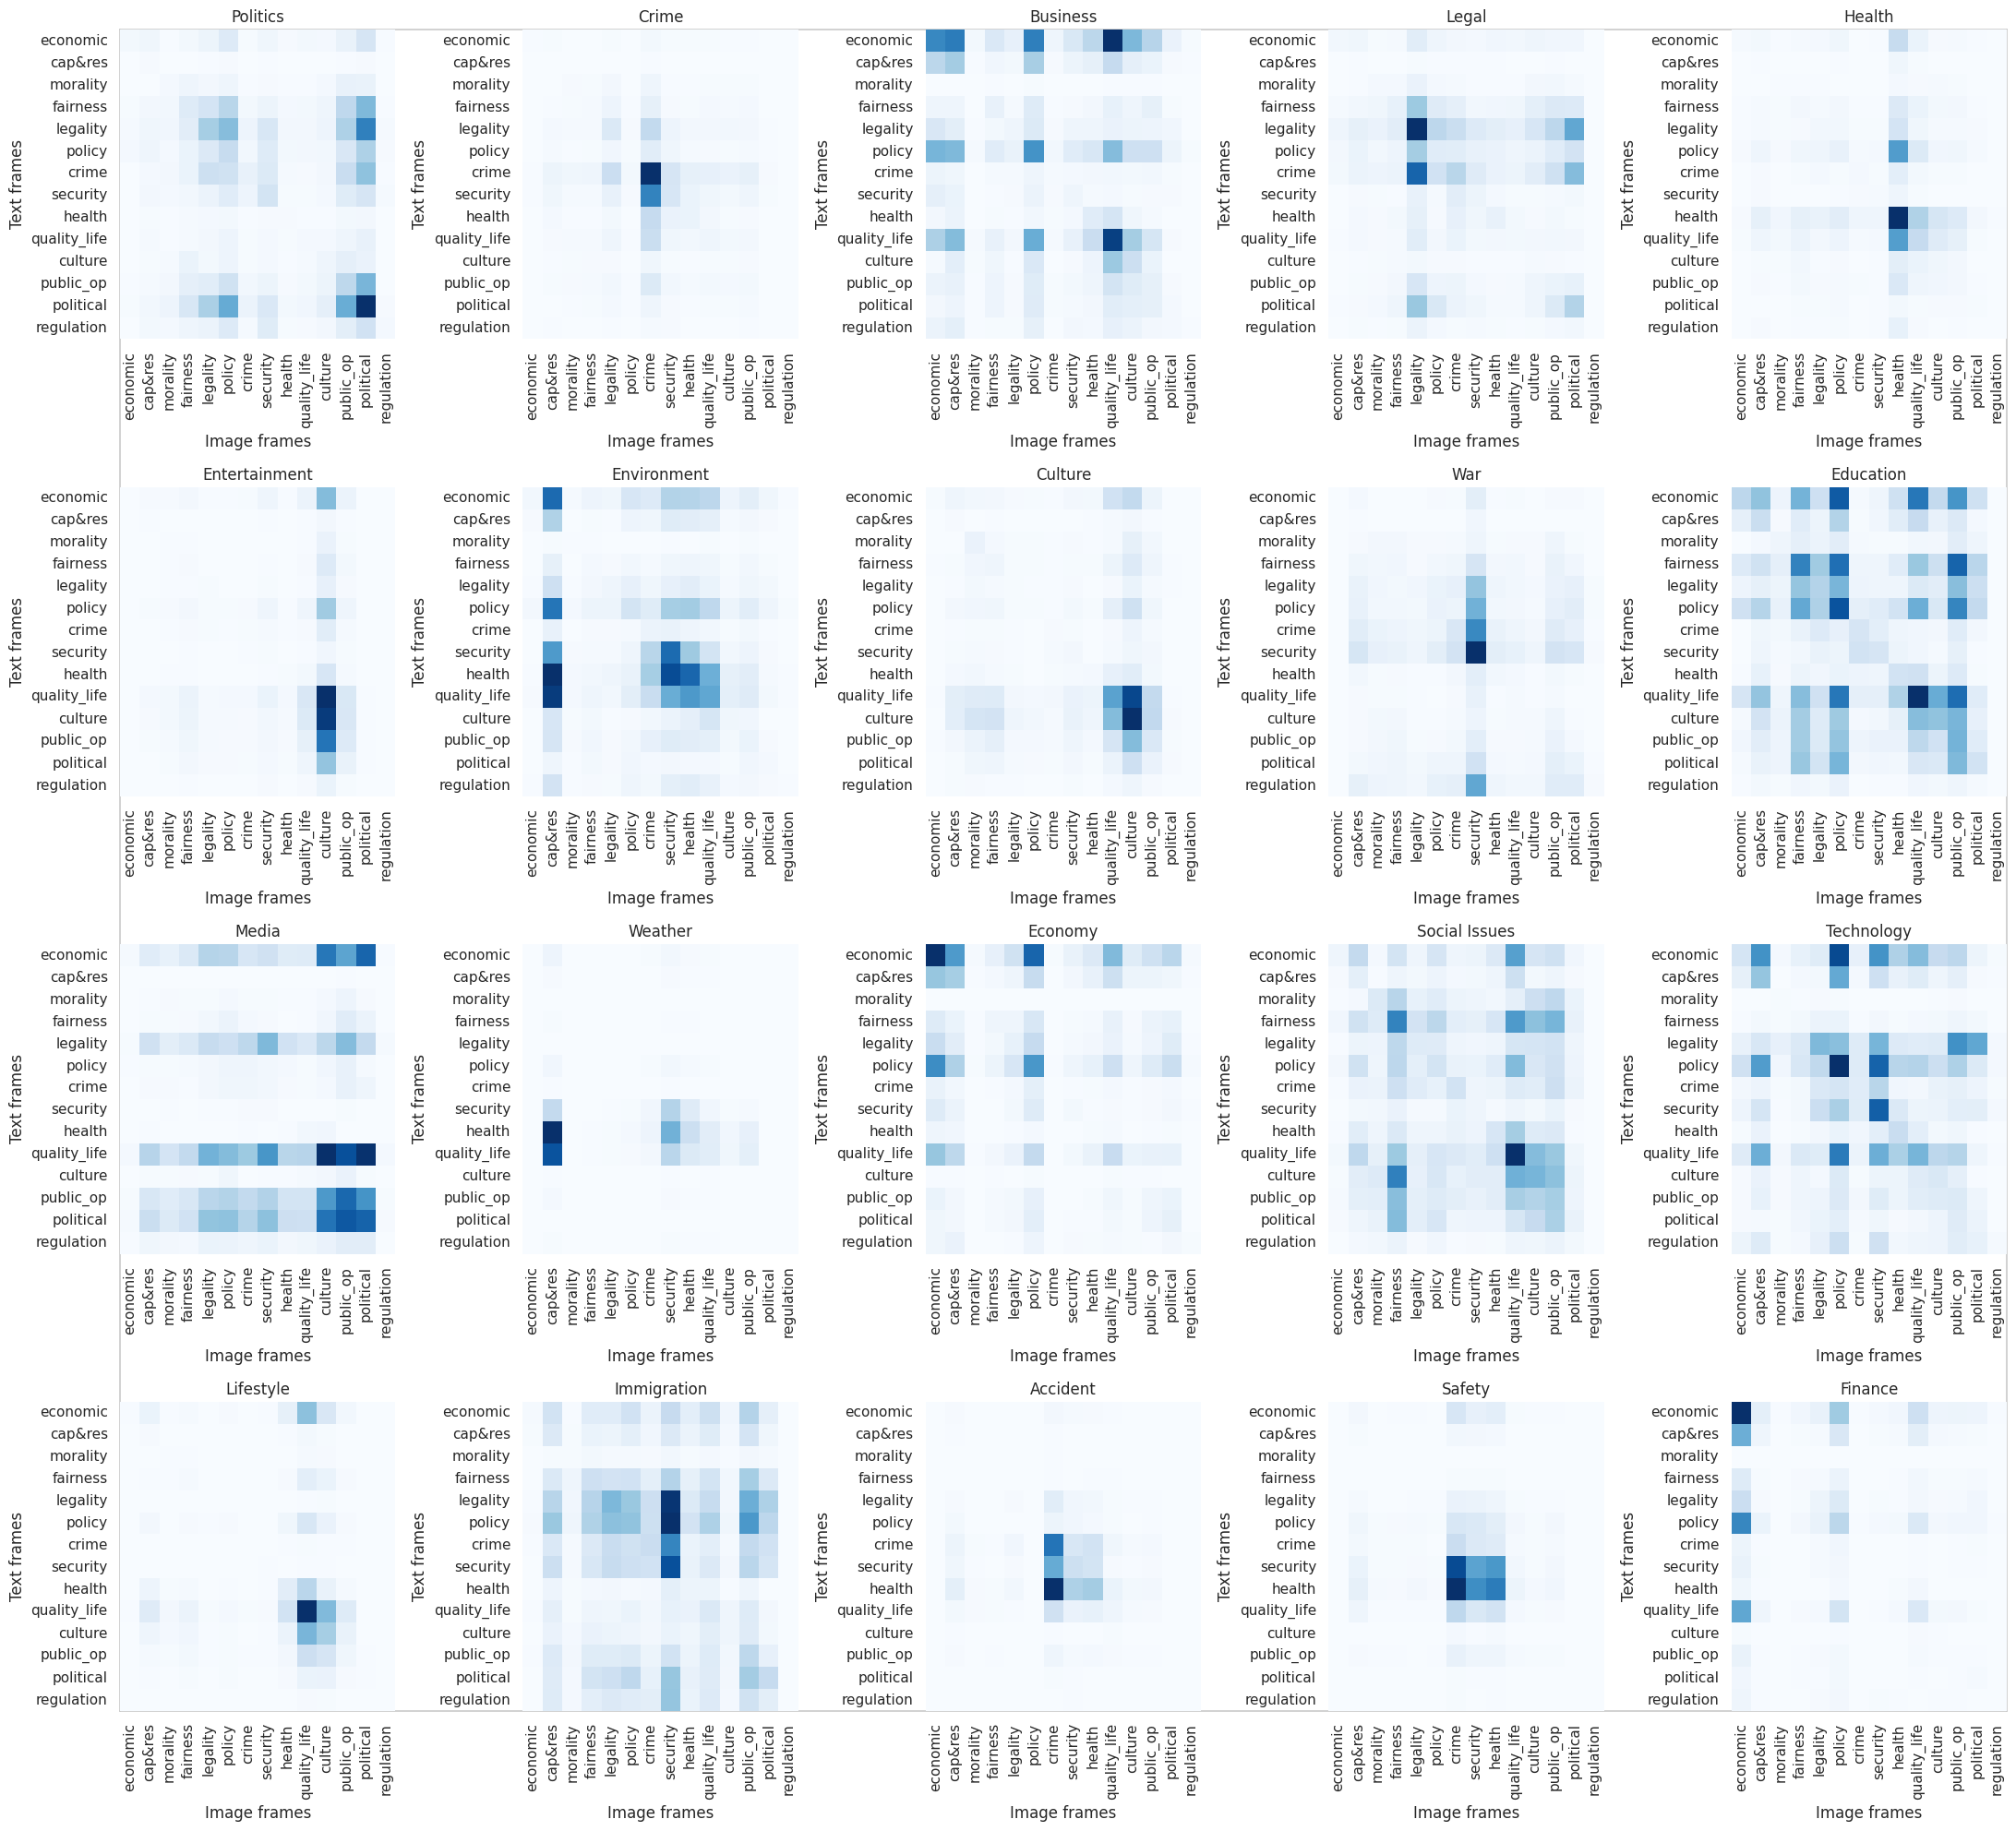

In [58]:
# Co-occurrence matrix for text, image frames for top topics
fig, ax = plt.subplots(figsize=(22,20))
plt.xticks([])
plt.yticks([])
for i, topic in enumerate(top_topic_list):
    topic_df = top_topic_df[top_topic_df['gpt-topic']==topic]
    cooc_matrix = pd.DataFrame(0, index=valid_frames, columns=valid_frames)
    for _, (txt_frm_list, img_frm_list) in topic_df[['text-generic-frame', 'img-generic-frame']].iterrows():
        for txt_frm in txt_frm_list:
            for img_frm in img_frm_list:
                if txt_frm in valid_frames and img_frm in valid_frames:
                    cooc_matrix.loc[txt_frm, img_frm] += 1
    ax = plt.subplot(4,5,i+1)
    sns.heatmap(cooc_matrix, cmap='Blues', cbar=False)
    plt.title(topic)
    plt.xlabel('Image frames')
    plt.ylabel('Text frames')
plt.tight_layout()
plt.show()

### Img vs Text

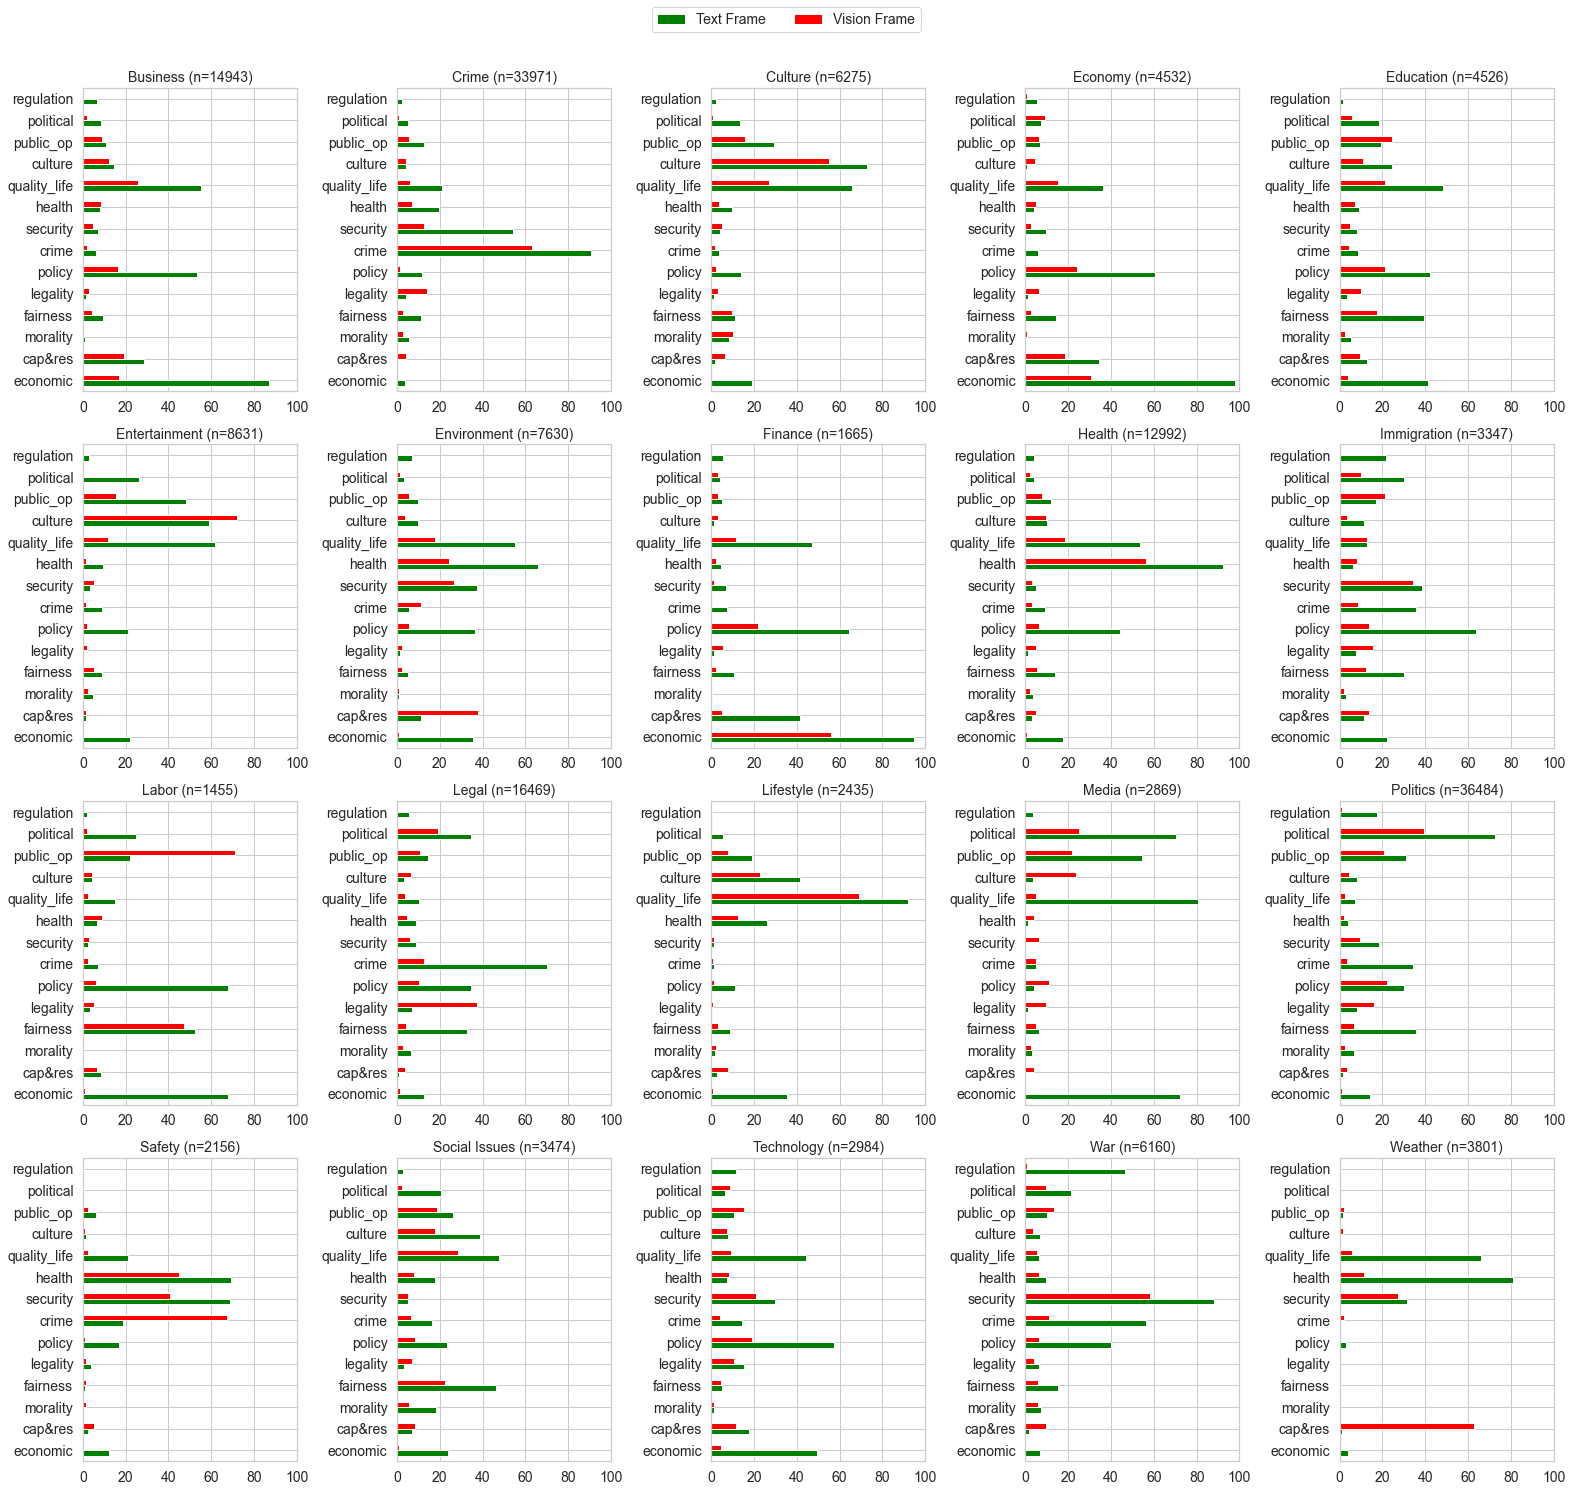

In [97]:
# top_topic_df = combined_topic_df[combined_topic_df['gpt_topic'].isin(top_topic_list)]
# Grouped bar plot for each topic
fig, ax = plt.subplots(figsize=(22,20))
plt.xticks([])
plt.yticks([])
i = 1
topic_frame_counts = []
for group_name, group in top_topic_df.groupby('gpt_topic'):
    text_frame_counter = {f:0.0 for f in valid_frames}
    vision_frame_counter = {f:0.0 for f in valid_frames}
    for index, row in group.iterrows():
        for frame_pred in row['text-generic-frame']:
            text_frame_counter[frame_pred] += 1/len(group)
        for frame_pred in row['img-generic-frame']:
            vision_frame_counter[frame_pred] += 1/len(group)
    text_frame_counter_df = pd.DataFrame.from_dict(text_frame_counter, orient='index').reset_index()
    text_frame_counter_df.columns = ['Frame', 'Text_Frame_Count']
    vision_frame_counter_df = pd.DataFrame.from_dict(vision_frame_counter, orient='index').reset_index()
    vision_frame_counter_df.columns = ['Frame', 'Image_Frame_Count']
    frame_counter_df = pd.merge(text_frame_counter_df, vision_frame_counter_df, on='Frame', how='outer')
    ax = plt.subplot(4,5,i)
    i+=1
    plt.title(group_name+' (n='+str(len(group))+')', fontsize=14)
    frame_counter_df.set_index('Frame', inplace=True)
    frame_counter_df = frame_counter_df.loc[frame_counter_df.index[:-1]]
    frame_counter_df = frame_counter_df*100
    ax.set_xlim([0, 100])
    frame_counter_df.plot(kind='barh', ax=ax, legend=False, xlabel='', ylabel='', fontsize=14, color=['green', 'red'])
    frame_counter_df.columns = [group_name+' Text Frame', group_name+' Vision Frame']
    topic_frame_counts.append(frame_counter_df)
plt.tight_layout()
handles, _ = ax.get_legend_handles_labels()
fig.legend(handles, ['Text Frame', 'Vision Frame'], loc='upper center', bbox_to_anchor=(0.5, 1.04), ncol=2, fontsize=14)
plt.savefig("../data/figures/top_20_topic_frame_distribution.png", bbox_inches='tight', dpi=300)
plt.show()

In [98]:
sel_topic_list = ['Environment', 'Immigration', 'Labor', 'War', 'Education']
selected_topic_df = combined_topic_df[combined_topic_df['gpt_topic'].isin(sel_topic_list)]

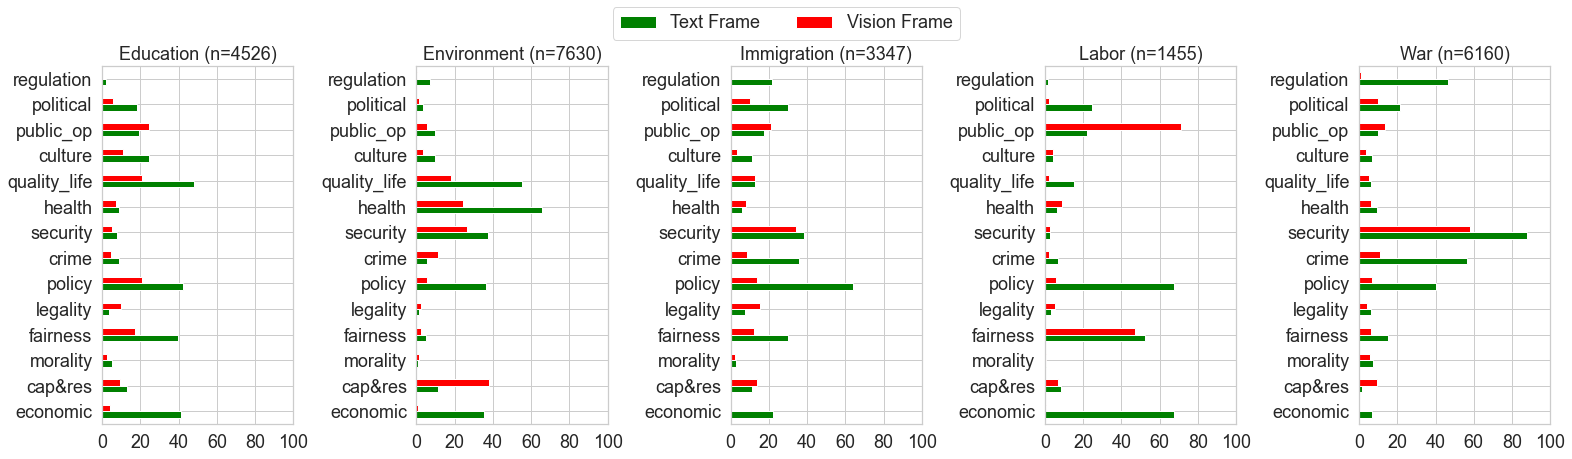

In [ ]:
# Percentage difference in frequency grouped bar plot for selected topics

fig, ax = plt.subplots(figsize=(22,6))
plt.xticks([])
plt.yticks([])
i = 1
topic_frame_counts = []
for group_name, group in selected_topic_df.groupby('gpt_topic'):
    text_frame_counter = {f:0.0 for f in valid_frames}
    vision_frame_counter = {f:0.0 for f in valid_frames}
    for index, row in group.iterrows():
        for frame_pred in row['text-generic-frame']:
            text_frame_counter[frame_pred] += 1/len(group)
        for frame_pred in row['img-generic-frame']:
            vision_frame_counter[frame_pred] += 1/len(group)
    text_frame_counter_df = pd.DataFrame.from_dict(text_frame_counter, orient='index').reset_index()
    text_frame_counter_df.columns = ['Frame', 'Text_Frame_Count']
    vision_frame_counter_df = pd.DataFrame.from_dict(vision_frame_counter, orient='index').reset_index()
    vision_frame_counter_df.columns = ['Frame', 'Image_Frame_Count']
    frame_counter_df = pd.merge(text_frame_counter_df, vision_frame_counter_df, on='Frame', how='outer')
    ax = plt.subplot(1,5,i)
    i+=1
    plt.title(group_name+' (n='+str(len(group))+')', fontsize=18)
    frame_counter_df.set_index('Frame', inplace=True)
    frame_counter_df = frame_counter_df.loc[frame_counter_df.index[:-1]]
    frame_counter_df = frame_counter_df*100
    ax.set_xlim([0, 100])
    frame_counter_df.plot(kind='barh', ax=ax, legend=False, xlabel='', ylabel='', fontsize=18, color=['green', 'red'])
    frame_counter_df.columns = [group_name+' Text Frame', group_name+' Vision Frame']
    topic_frame_counts.append(frame_counter_df)
plt.tight_layout()
handles, _ = ax.get_legend_handles_labels()
fig.legend(handles, ['Text Frame', 'Vision Frame'], loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=2, fontsize=18)
plt.savefig("../data/figures/selected_topic_frame_distribution.png", bbox_inches='tight', dpi=300)
plt.show()

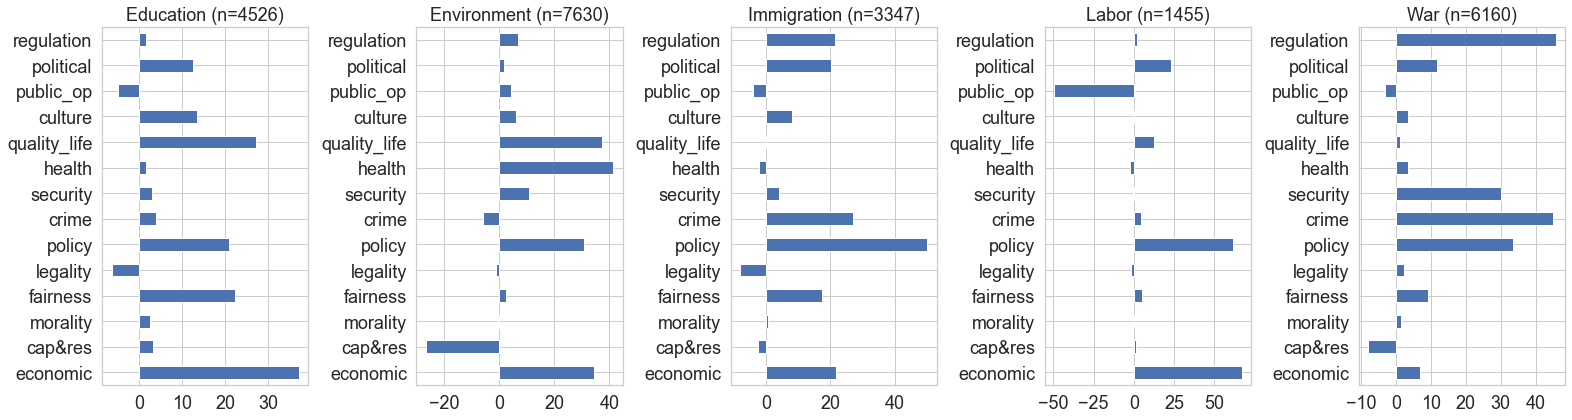

In [149]:
# Percentage difference plot for selected topics

# Grouped bar plot for each topic
fig, ax = plt.subplots(figsize=(22,6))
plt.xticks([])
plt.yticks([])
i = 1
topic_frame_counts = []
for group_name, group in selected_topic_df.groupby('gpt_topic'):
    text_frame_counter = {f:0.0 for f in valid_frames}
    vision_frame_counter = {f:0.0 for f in valid_frames}
    for index, row in group.iterrows():
        for frame_pred in row['text-generic-frame']:
            text_frame_counter[frame_pred] += 1/len(group)
        for frame_pred in row['img-generic-frame']:
            vision_frame_counter[frame_pred] += 1/len(group)
    text_frame_counter_df = pd.DataFrame.from_dict(text_frame_counter, orient='index').reset_index()
    text_frame_counter_df.columns = ['Frame', 'Text_Frame_Count']
    vision_frame_counter_df = pd.DataFrame.from_dict(vision_frame_counter, orient='index').reset_index()
    vision_frame_counter_df.columns = ['Frame', 'Image_Frame_Count']
    frame_counter_df = pd.merge(text_frame_counter_df, vision_frame_counter_df, on='Frame', how='outer')
    ax = plt.subplot(1,5,i)
    i+=1
    plt.title(group_name+' (n='+str(len(group))+')', fontsize=18)
    frame_counter_df.set_index('Frame', inplace=True)
    frame_counter_df = frame_counter_df.loc[frame_counter_df.index[:-1]]
    frame_counter_df = frame_counter_df*100
    frame_rank = frame_counter_df['Text_Frame_Count'] - frame_counter_df['Image_Frame_Count']
    frame_rank.plot(kind='barh', ax=ax, legend=False, xlabel='', ylabel='', fontsize=18)
    topic_frame_counts.append(frame_counter_df)
plt.tight_layout()
# handles, _ = ax.get_legend_handles_labels()
# fig.legend(handles, ['Text Frame', 'Vision Frame'], loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=2, fontsize=18)
plt.show()

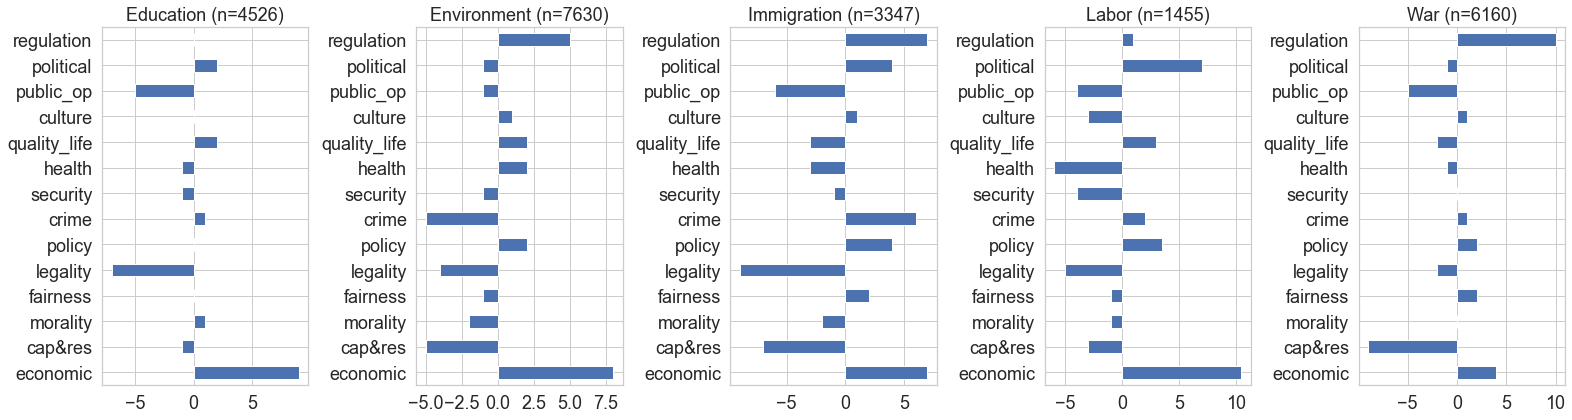

In [164]:
# Rank difference (text-image) plot for selected topics

# Grouped bar plot for each topic
fig, ax = plt.subplots(figsize=(22,6))
plt.xticks([])
plt.yticks([])
i = 1
for group_name, group in selected_topic_df.groupby('gpt_topic'):
    text_frame_counter = {f:0.0 for f in valid_frames}
    vision_frame_counter = {f:0.0 for f in valid_frames}
    for index, row in group.iterrows():
        for frame_pred in row['text-generic-frame']:
            text_frame_counter[frame_pred] += 1/len(group)
        for frame_pred in row['img-generic-frame']:
            vision_frame_counter[frame_pred] += 1/len(group)
    text_frame_counter_df = pd.DataFrame.from_dict(text_frame_counter, orient='index').reset_index()
    text_frame_counter_df.columns = ['Frame', 'Text_Frame_Count']
    vision_frame_counter_df = pd.DataFrame.from_dict(vision_frame_counter, orient='index').reset_index()
    vision_frame_counter_df.columns = ['Frame', 'Image_Frame_Count']
    frame_counter_df = pd.merge(text_frame_counter_df, vision_frame_counter_df, on='Frame', how='outer')
    ax = plt.subplot(1,5,i)
    i+=1
    plt.title(group_name+' (n='+str(len(group))+')', fontsize=18)
    frame_counter_df.set_index('Frame', inplace=True)
    frame_counter_df = frame_counter_df.loc[frame_counter_df.index[:-1]]
    frame_rank = frame_counter_df.rank()
    frame_rank_sub = frame_rank['Text_Frame_Count'] - frame_rank['Image_Frame_Count']
    frame_rank_sub.plot(kind='barh', ax=ax, legend=False, xlabel='', ylabel='', fontsize=18)
plt.tight_layout()
plt.show()

### Entity

In [70]:
same_entity_df = combined_df[combined_df['text-entity-name'] == combined_df['img-entity-name']]

In [71]:
entities = list(same_entity_df['text-entity-name'].value_counts()[:25].keys())

In [72]:
same_entity_df = same_entity_df[same_entity_df['text-entity-name'].isin(entities)]

In [84]:
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1, 'mixed': 0, 'none': 0}

In [89]:
entity_scores = {}
for entity_name, entity_group in same_entity_df.groupby('text-entity-name'):
    text_score = entity_group['text-entity-sentiment'].apply(lambda x: sentiment_map[x.lower() if x.lower() in sentiment_map else 'none'])
    img_score = entity_group['img-entity-sentiment'].apply(lambda x: sentiment_map[x.lower() if x.lower() in sentiment_map else 'none'])
    entity_scores[entity_name] = {'text_sentiment': text_score.mean(), 'img_sentiment': img_score.mean()}
entity_scores_df = pd.DataFrame.from_dict(entity_scores, orient='index')


In [105]:
sorted_ents = list((entity_scores_df['img_sentiment'] - entity_scores_df['text_sentiment']).abs().sort_values(ascending=False).keys())

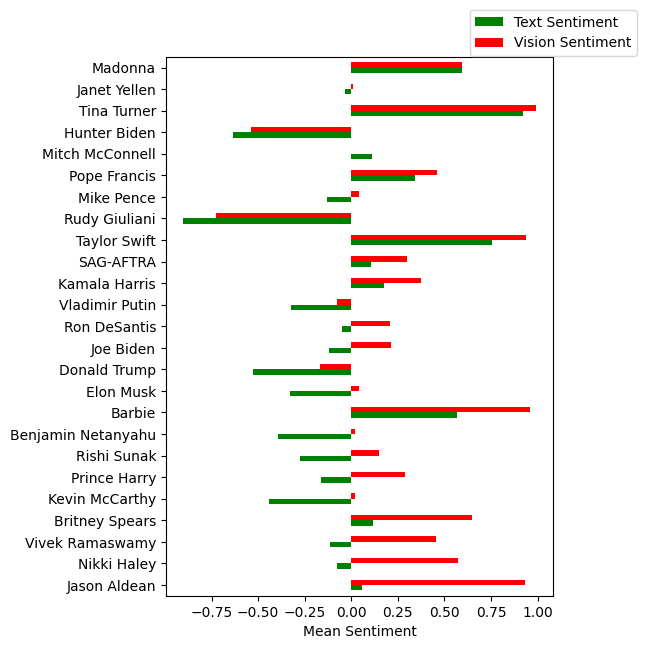

In [107]:
entity_scores_df.loc[sorted_ents].plot(kind='barh', figsize=(5,7), color=['green', 'red'], xlabel='Mean Sentiment')
plt.legend(['Text Sentiment', 'Vision Sentiment'], bbox_to_anchor=(1, 1.1), loc='upper center')

In [79]:
sentiment_img

,Image Sentiment
img-entity-sentiment,
positive,0.96063
neutral,0.03937
